In [1]:
import os
import zipfile

def total_files(folder_path):
    num_files = len([f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))])
    return num_files

def total_files_in_zip(zip_path, folder_inside_zip):
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        return len([name for name in zip_ref.namelist() if name.startswith(folder_inside_zip) and not name.endswith('/')])

zip_path = r"C:\MLprjt\archive.zip"

# Update the folder paths for counting
train_files_healthy = "Train/Train/Healthy/"
train_files_powdery = "Train/Train/Powdery/"
train_files_rust = "Train/Train/Rust/"
test_files_healthy = "Test/Test/Healthy/"
test_files_powdery = "Test/Test/Powdery/"
test_files_rust = "Test/Test/Rust/"
valid_files_healthy = "Validation/Validation/Healthy/"
valid_files_powdery = "Validation/Validation/Powdery/"
valid_files_rust = "Validation/Validation/Rust/"

print("Number of healthy leaf images in training set", total_files_in_zip(zip_path, train_files_healthy))
print("Number of powder leaf images in training set", total_files_in_zip(zip_path, train_files_powdery))
print("Number of rusty leaf images in training set", total_files_in_zip(zip_path, train_files_rust))

print("========================================================")

print("Number of healthy leaf images in test set", total_files_in_zip(zip_path, test_files_healthy))
print("Number of powder leaf images in test set", total_files_in_zip(zip_path, test_files_powdery))
print("Number of rusty leaf images in test set", total_files_in_zip(zip_path, test_files_rust))

print("========================================================")

print("Number of healthy leaf images in validation set", total_files_in_zip(zip_path, valid_files_healthy))
print("Number of powder leaf images in validation set", total_files_in_zip(zip_path, valid_files_powdery))
print("Number of rusty leaf images in validation set", total_files_in_zip(zip_path, valid_files_rust))


Number of healthy leaf images in training set 458
Number of powder leaf images in training set 430
Number of rusty leaf images in training set 434
Number of healthy leaf images in test set 50
Number of powder leaf images in test set 50
Number of rusty leaf images in test set 50
Number of healthy leaf images in validation set 20
Number of powder leaf images in validation set 20
Number of rusty leaf images in validation set 20


In [2]:
pip install pillow

Note: you may need to restart the kernel to use updated packages.


In [3]:
import PIL
print(PIL.__version__)  # This should print the installed Pillow version


10.3.0


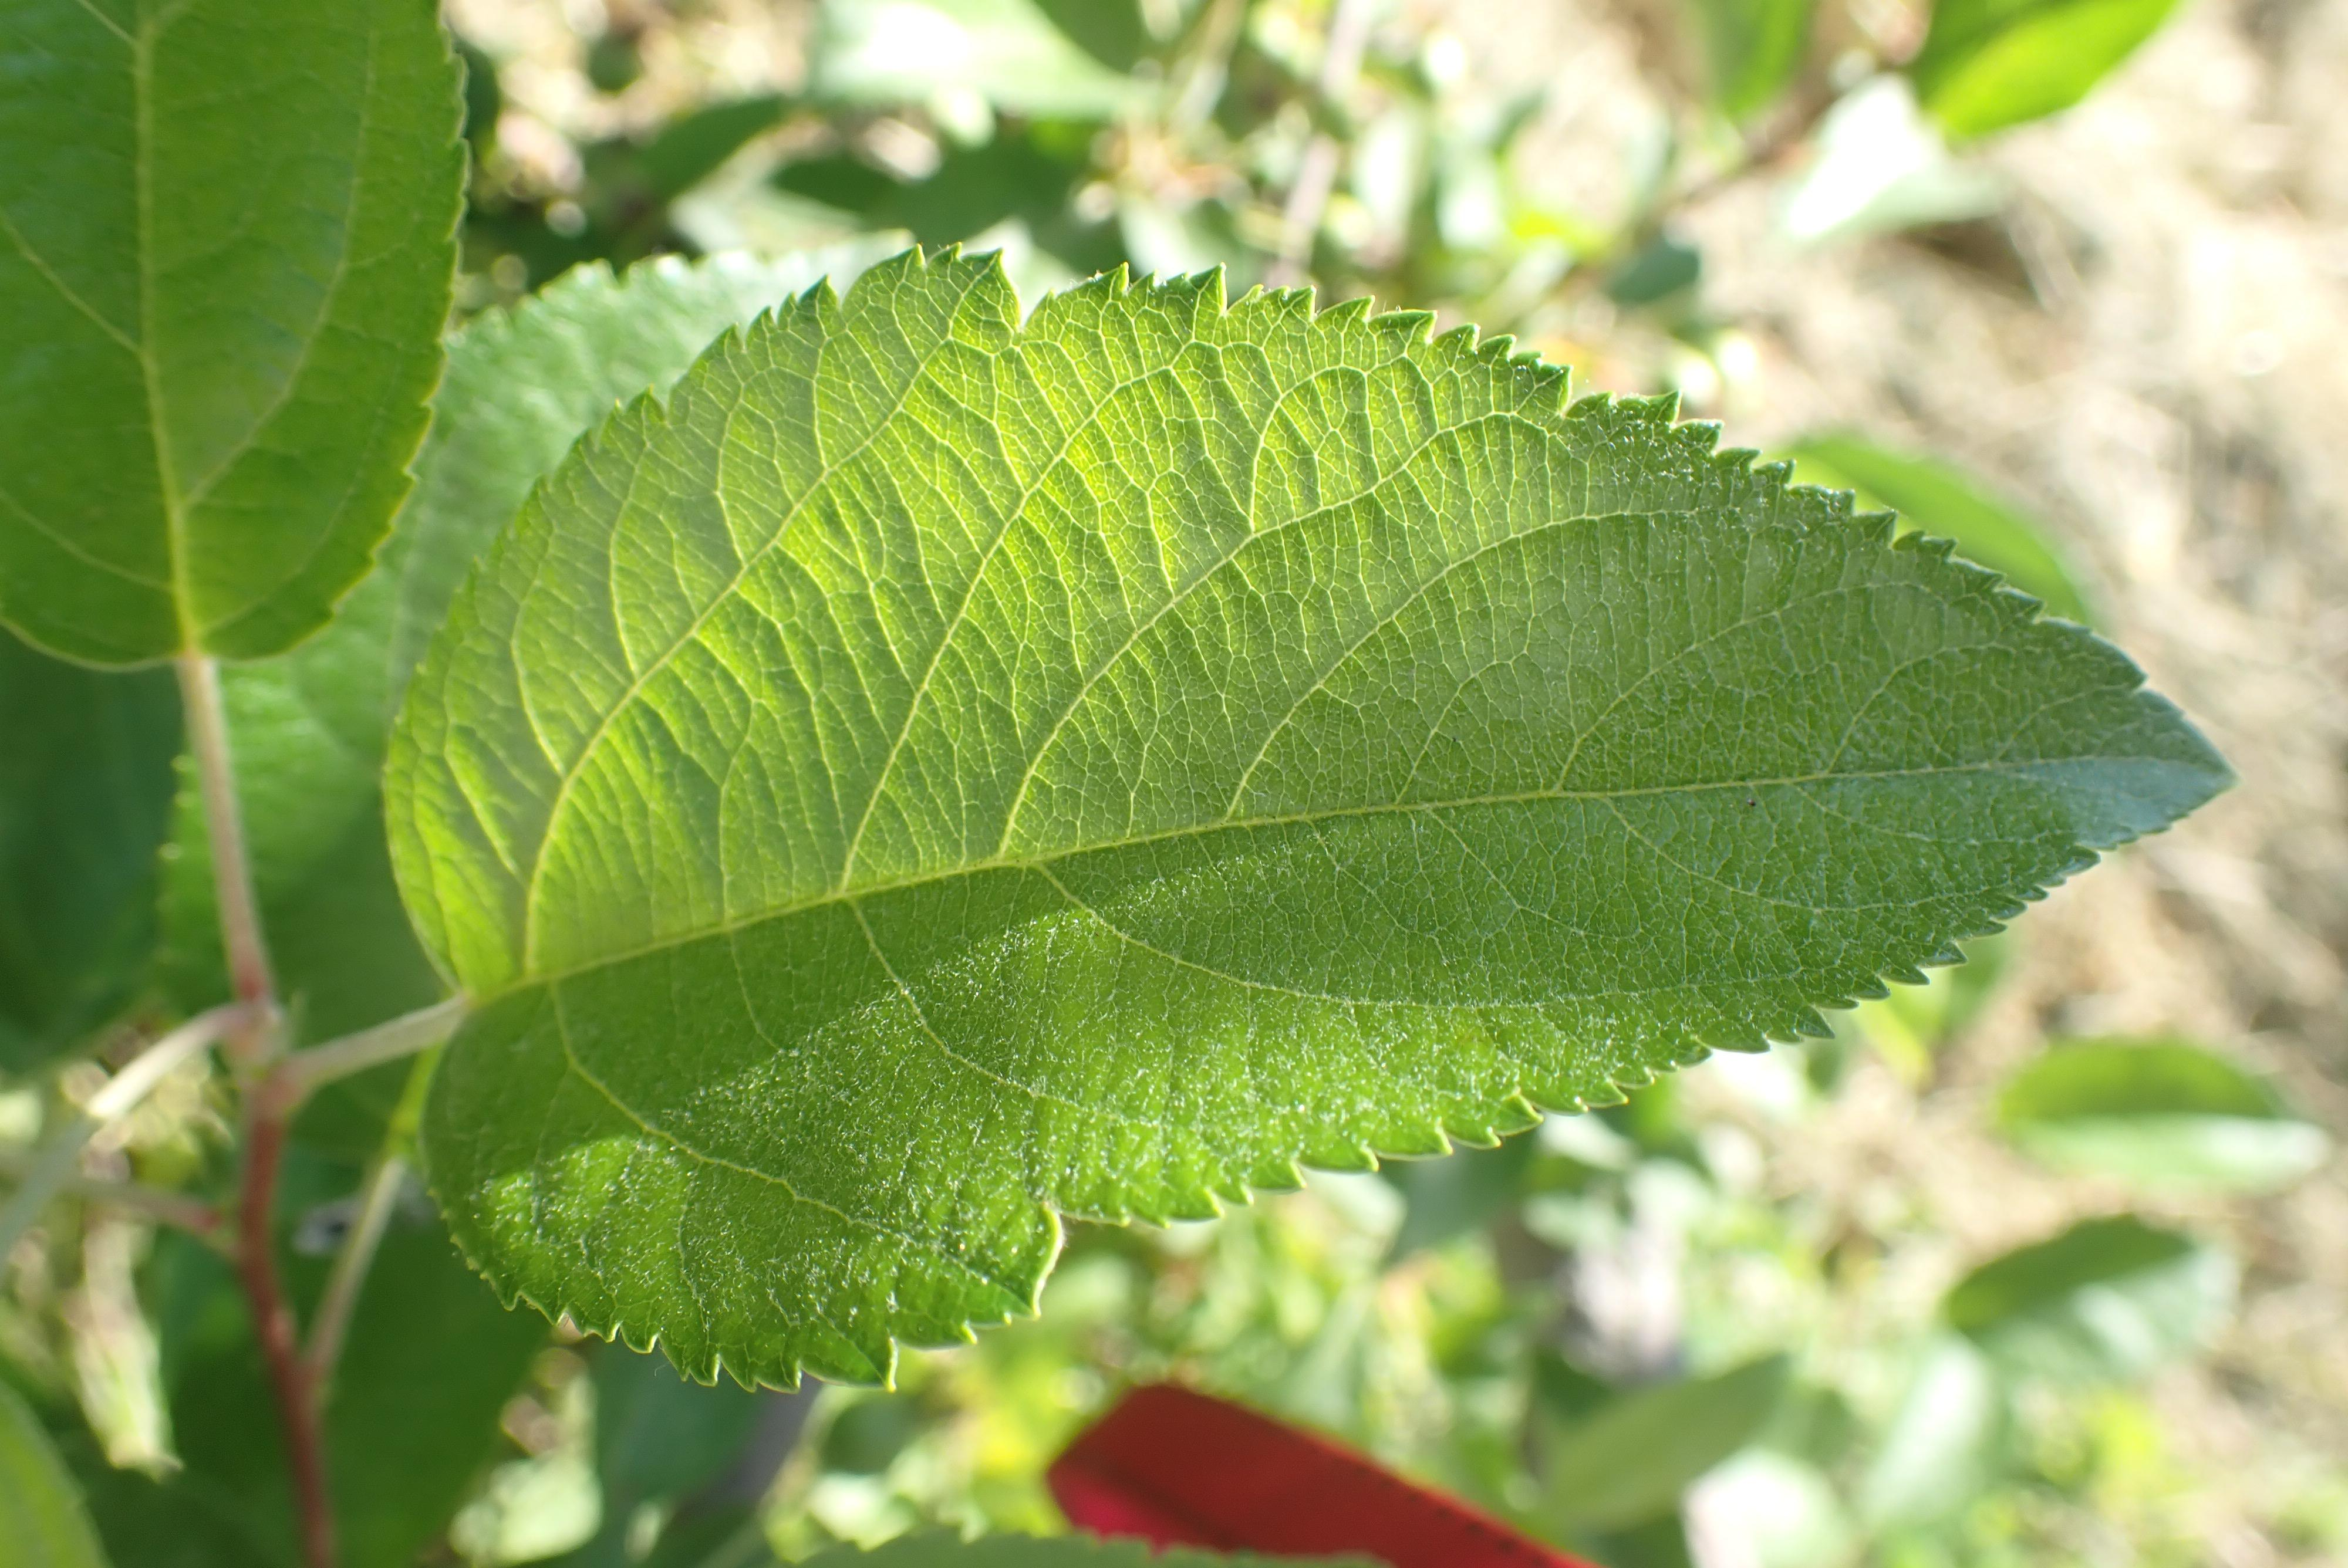

In [4]:
from PIL import Image
import IPython.display as display

image_path = r"C:\MLprjt\Train\Train\Healthy\8bc2979962db6549.jpg"

with open(image_path, 'rb') as f:
    display.display(display.Image(data=f.read(), width=500))

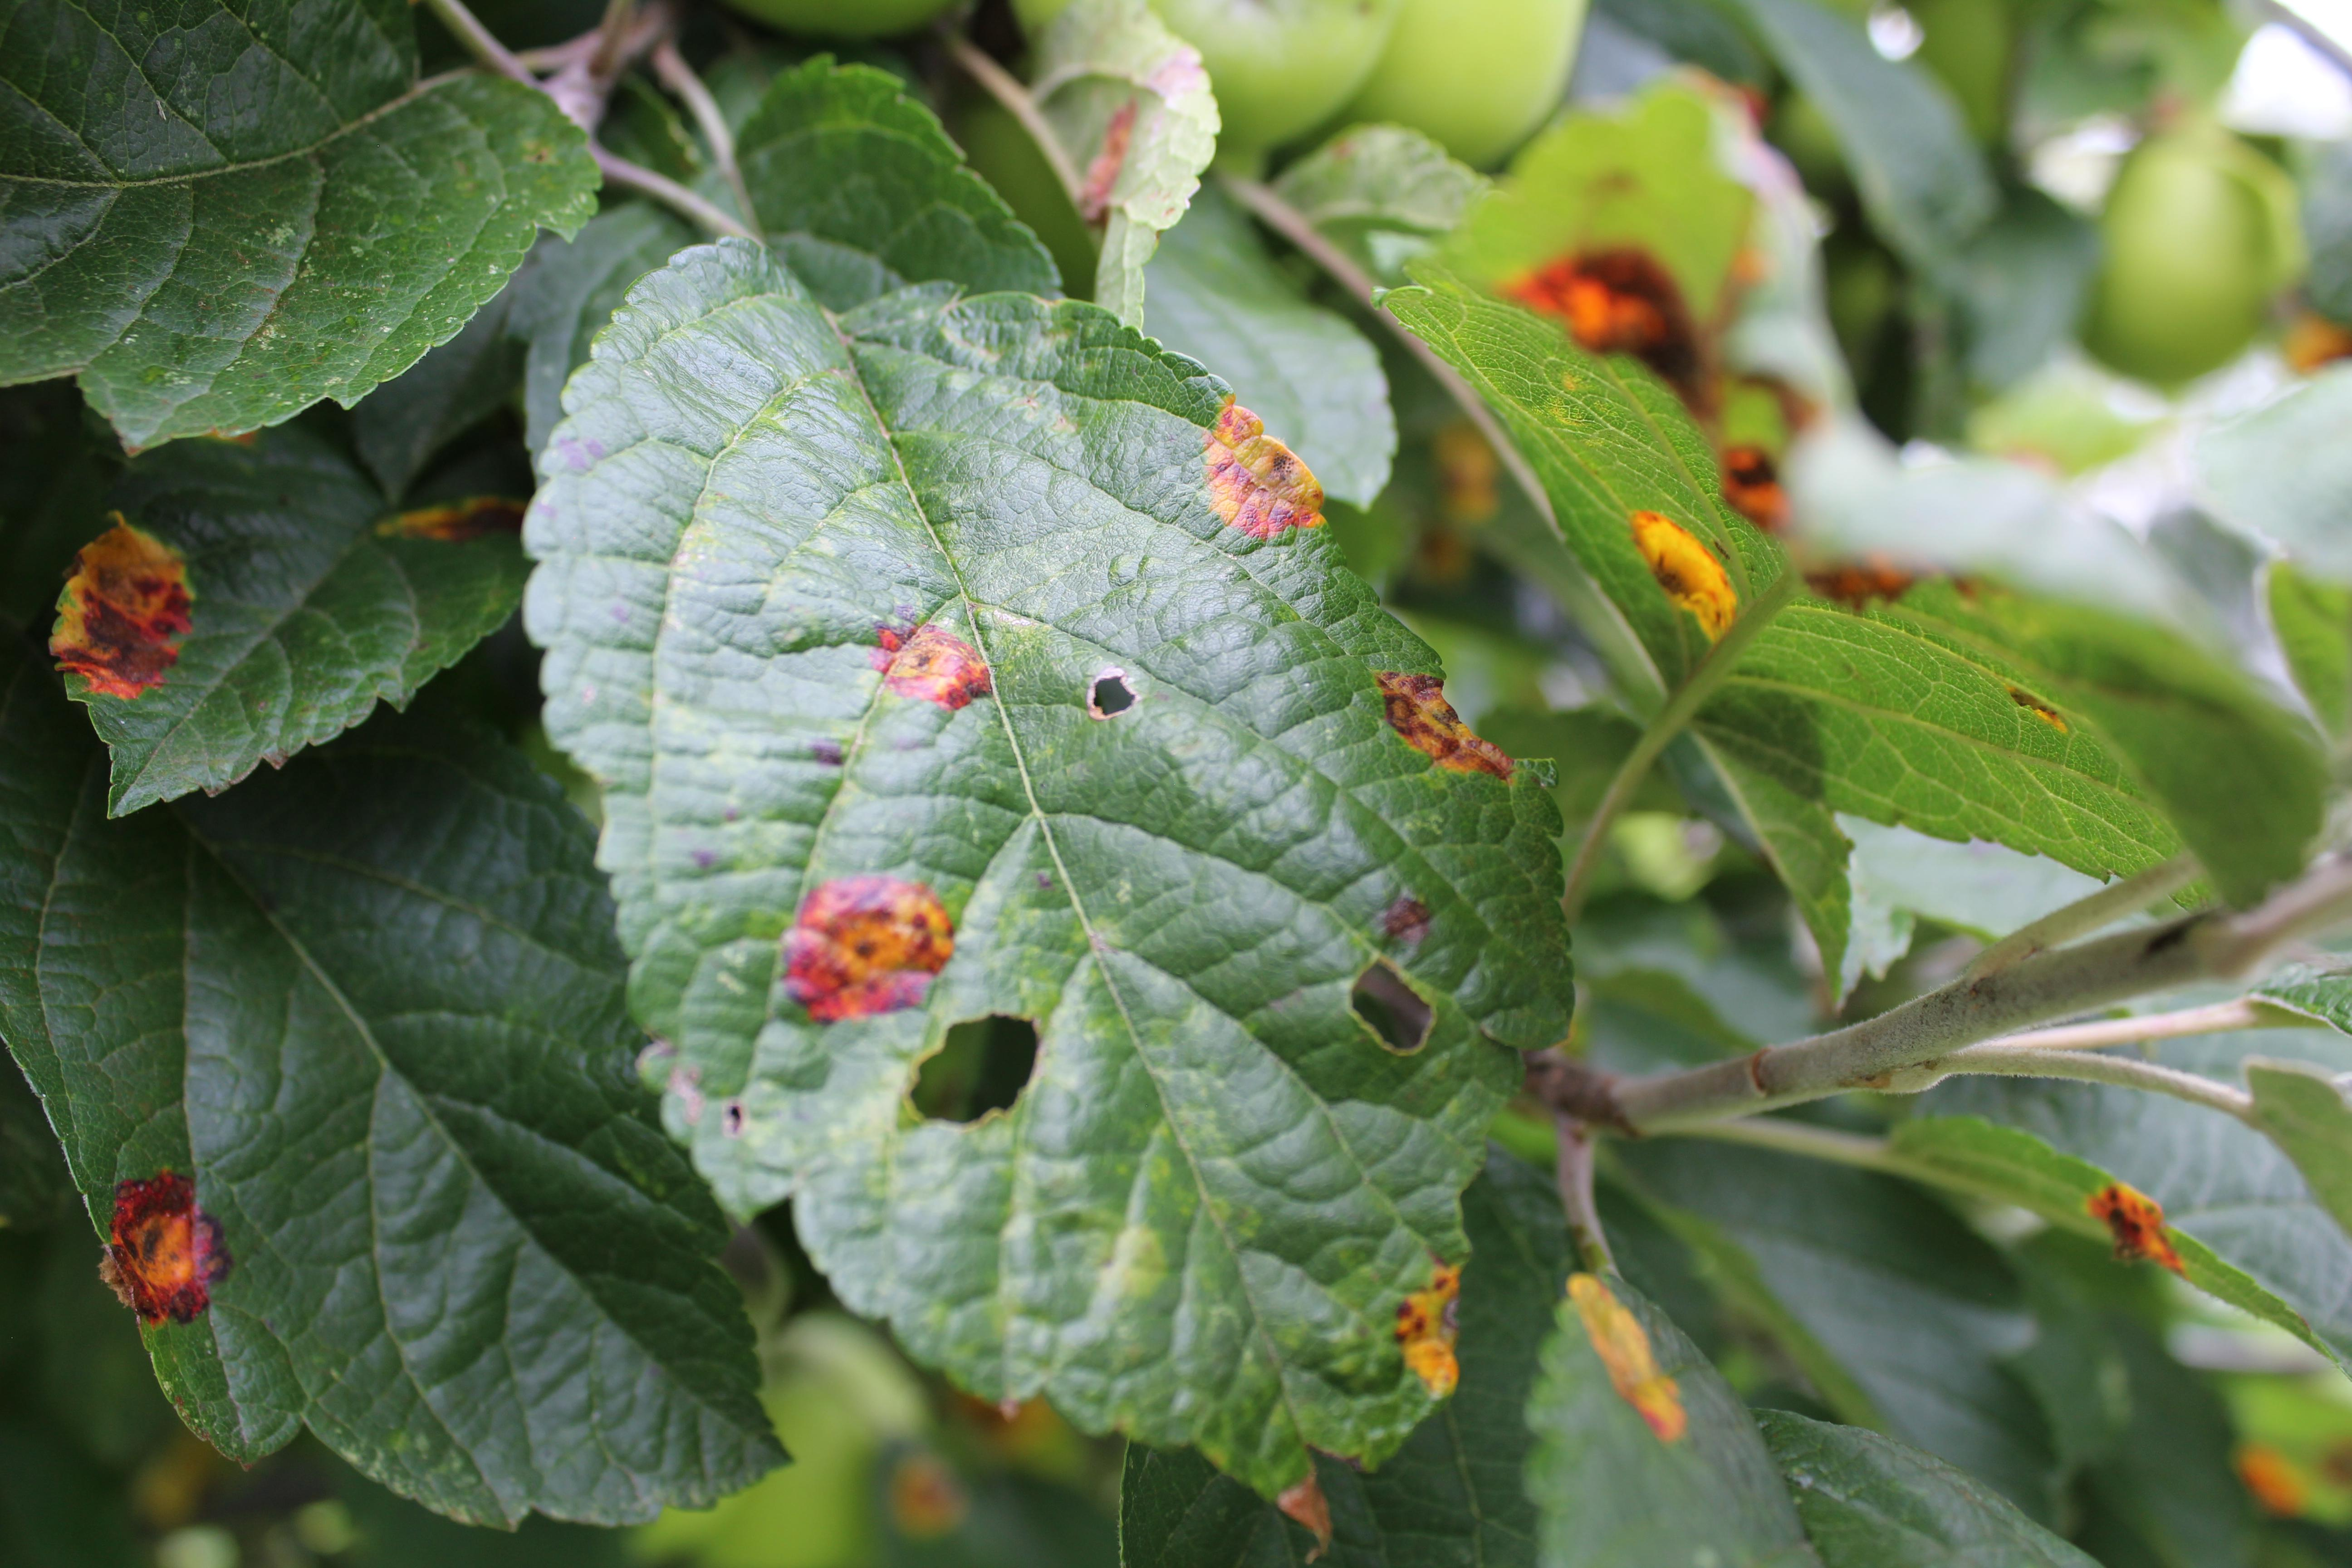

In [5]:
image_path = r"C:\MLprjt\Train\Train\Rust\8f9b3a381388ad9d.jpg"

with open(image_path, 'rb') as f:
    display.display(display.Image(data=f.read(), width=500))

In [6]:
pip install tensorflow --upgrade


Note: you may need to restart the kernel to use updated packages.


In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1.0 / 255)


In [8]:
train_generator = train_datagen.flow_from_directory(
    r'C:\MLprjt\Train\Train',
    target_size=(225, 225),
    batch_size=32,
    class_mode='categorical'
)

validation_generator = test_datagen.flow_from_directory(
    r'C:\MLprjt\Validation\Validation',
    target_size=(225, 225),
    batch_size=32,
    class_mode='categorical'
)


Found 1322 images belonging to 3 classes.
Found 60 images belonging to 3 classes.


In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input

# Initialize the model
model = Sequential()

# Add the input layer explicitly
model.add(Input(shape=(225, 225, 3)))

# Add the convolutional and pooling layers
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the output from the convolutional layers
model.add(Flatten())

# Add dense layers
model.add(Dense(64, activation='relu'))

# Output layer for 3 classes
model.add(Dense(3, activation='softmax'))

# Print the model summary
model.summary()



Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 223, 223, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 186624)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │    11,944,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,963,587 (45.64 MB)

 Trainable params: 11,963,587 (45.64 MB)

 Non-trainable params: 0 (0.00 B)

In [10]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module='keras')


In [11]:
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])


In [12]:
history = model.fit(
    train_generator,
    epochs=5,  # Number of epochs
    validation_data=validation_generator  # Validation generator
)


Epoch 1/5
42/42 ━━━━━━━━━━━━━━━━━━━━ 538s 13s/step - accuracy: 0.4279 - loss: 1.8722 - val_accuracy: 0.7167 - val_loss: 0.6388
Epoch 2/5
42/42 ━━━━━━━━━━━━━━━━━━━━ 1155s 28s/step - accuracy: 0.8141 - loss: 0.4850 - val_accuracy: 0.8167 - val_loss: 0.5430
Epoch 3/5
42/42 ━━━━━━━━━━━━━━━━━━━━ 265s 6s/step - accuracy: 0.8834 - loss: 0.3168 - val_accuracy: 0.8500 - val_loss: 0.4016
Epoch 4/5
42/42 ━━━━━━━━━━━━━━━━━━━━ 275s 7s/step - accuracy: 0.9262 - loss: 0.2443 - val_accuracy: 0.8333 - val_loss: 0.4104
Epoch 5/5
42/42 ━━━━━━━━━━━━━━━━━━━━ 284s 7s/step - accuracy: 0.9345 - loss: 0.2112 - val_accuracy: 0.7667 - val_loss: 0.6224


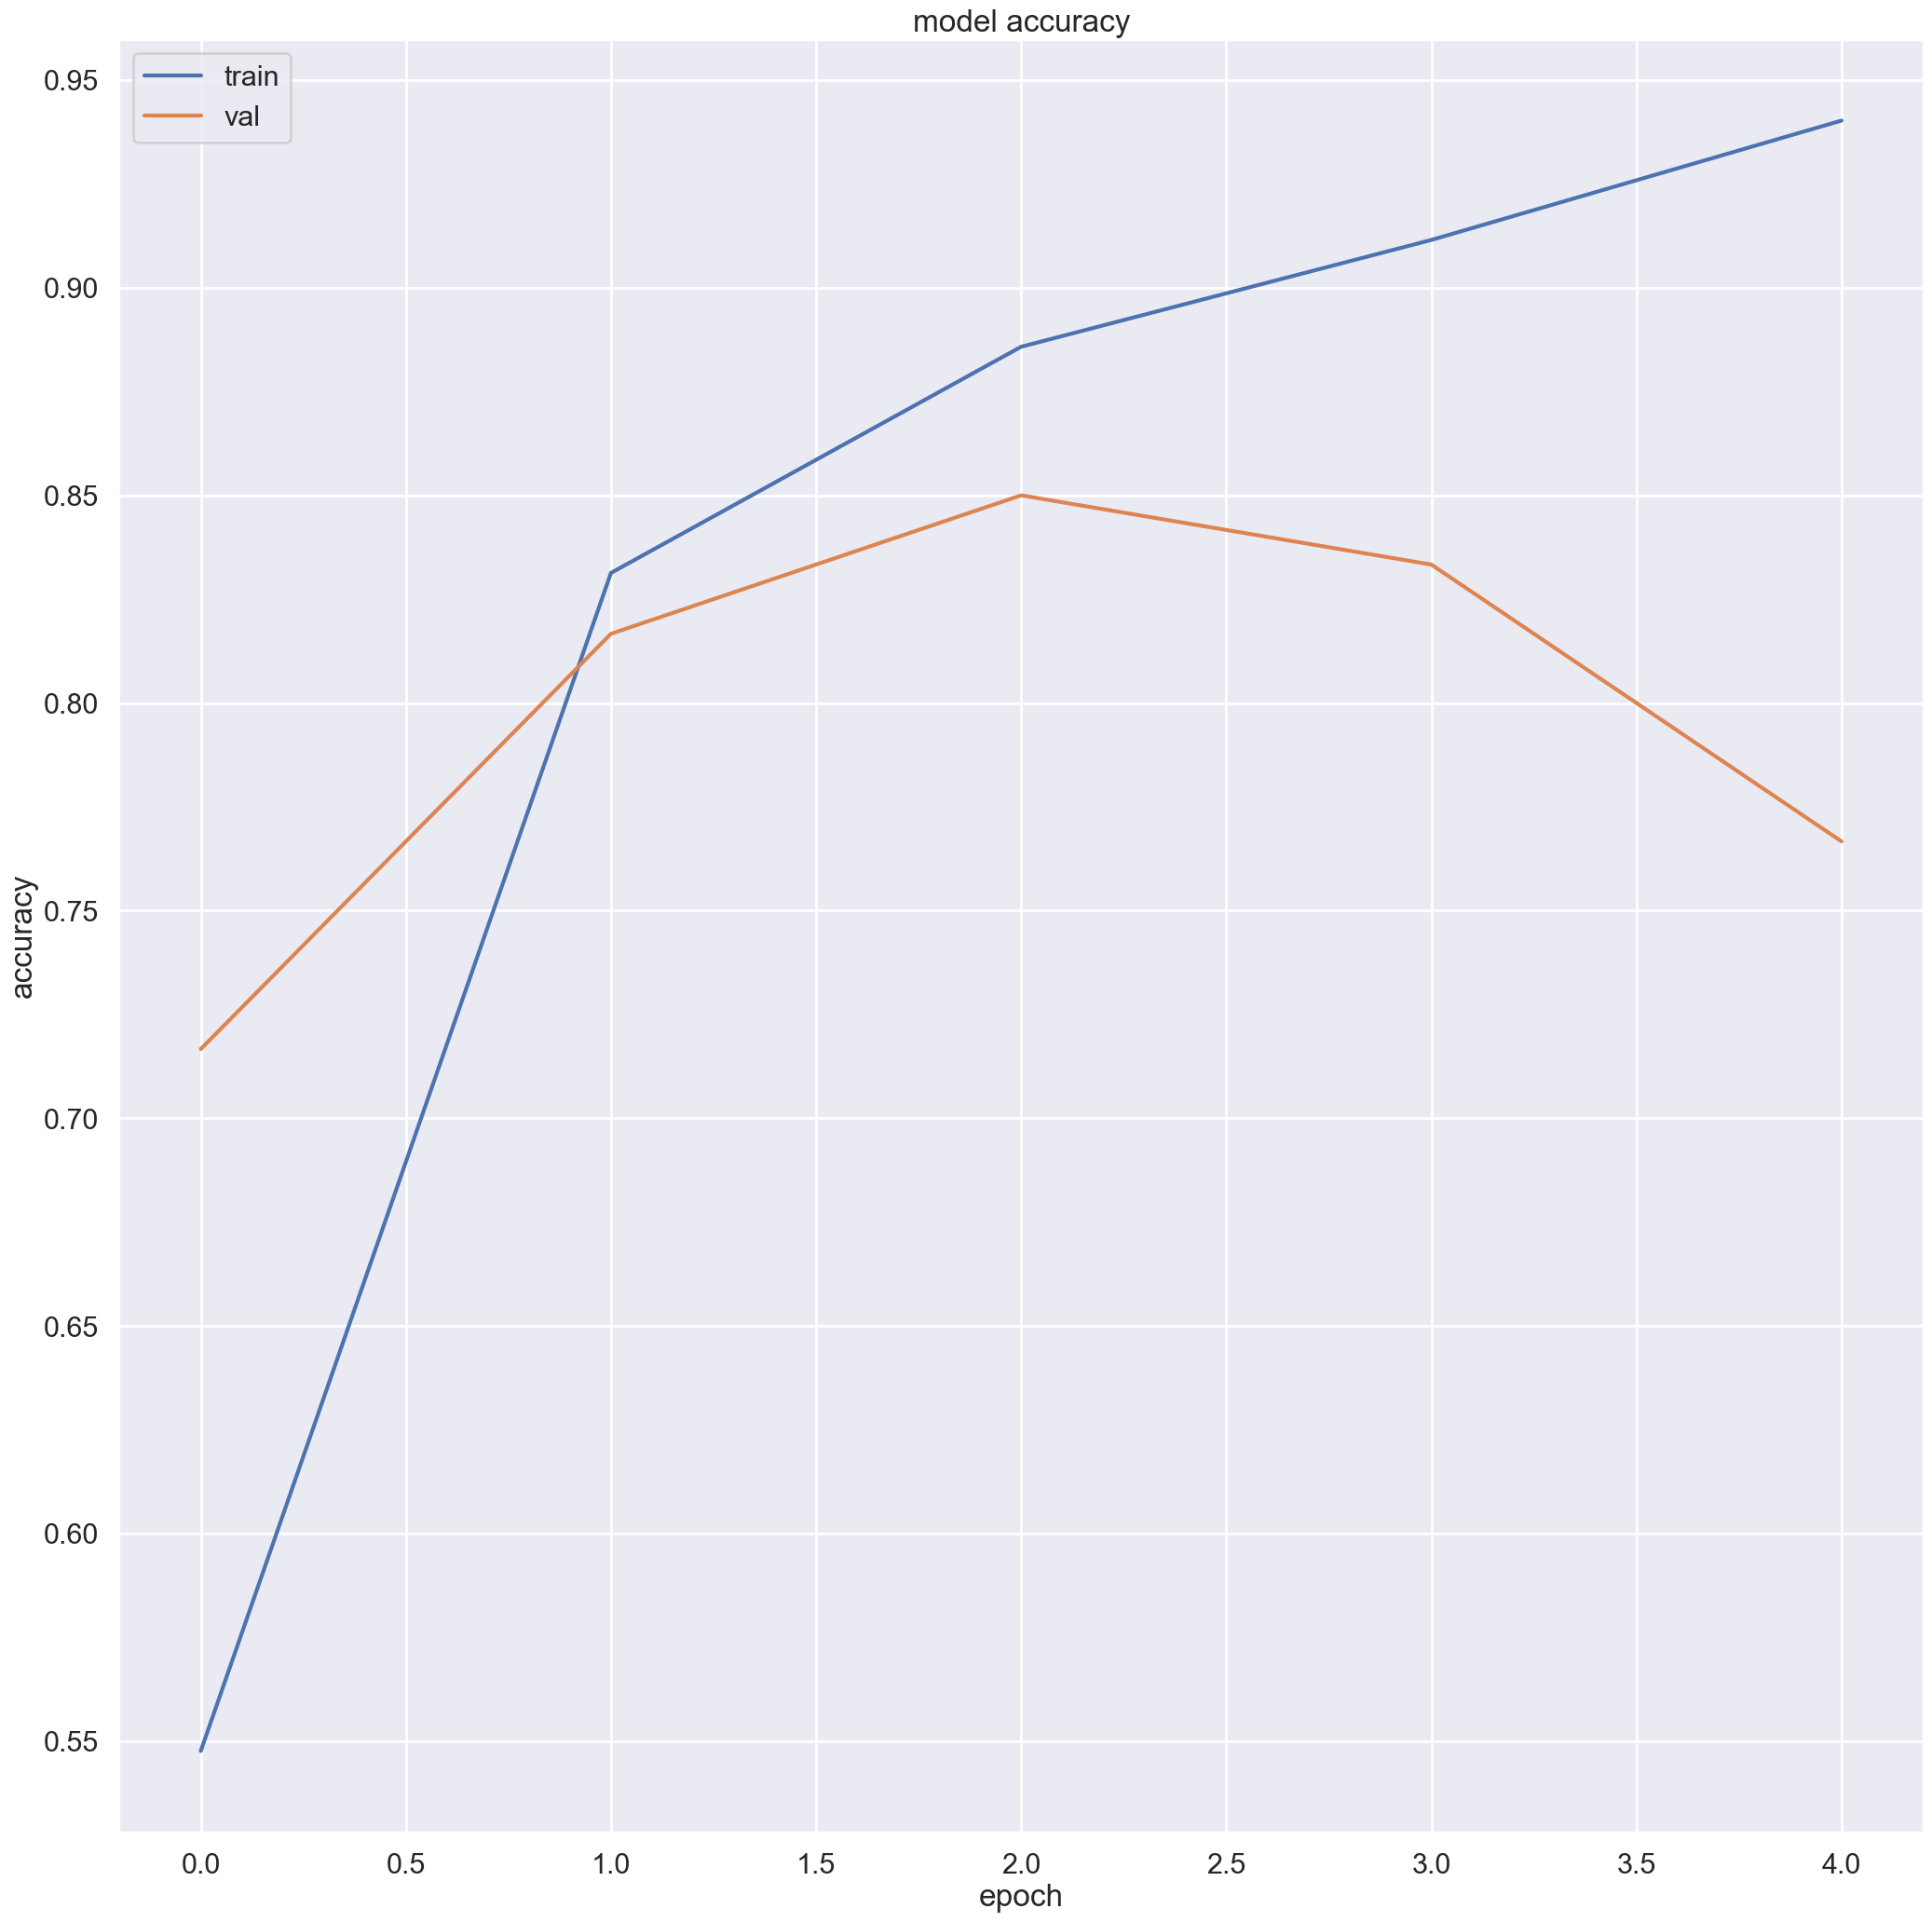

In [13]:
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure

import seaborn as sns
sns.set_theme()
sns.set_context("poster")

figure(figsize=(25, 25), dpi=100)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')


In [14]:
model.save('model.keras')


In [15]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

def preprocess_image(image_path, target_size=(225, 225)):
    img = load_img(image_path, target_size=target_size)
    x = img_to_array(img)
    x = x.astype('float32') / 255.
    x = np.expand_dims(x, axis=0)
    return x

x = preprocess_image(r"C:\MLprjt\Test\Test\Rust\95ac93e87a9744d1.jpg")

In [16]:
predictions = model.predict(x)
predictions[0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 610ms/step


array([1.7407763e-07, 1.5925075e-10, 9.9999988e-01], dtype=float32)

In [17]:
labels = train_generator.class_indices
labels = {v: k for k, v in labels.items()}
labels

{0: 'Healthy', 1: 'Powdery', 2: 'Rust'}

In [18]:
predicted_label = labels[np.argmax(predictions)]
print(predicted_label)

Rust
